In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg

from scipy.linalg import toeplitz

import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg') 
plt.rcParams.update({'font.size':14})
plt.rcParams["font.family"] = "Times New Roman"

## The matrix inverse

In [2]:
A = np.array([[1,4], [2,7]])

Ainv = np.linalg.inv(A)

A@Ainv

array([[1., 0.],
       [0., 1.]])

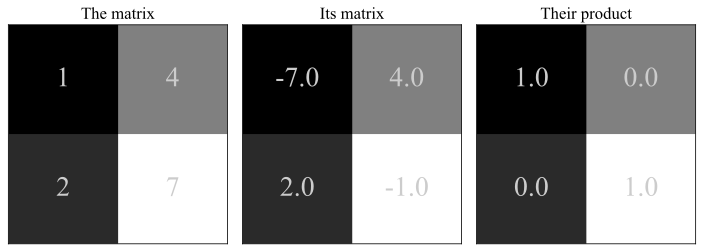

In [3]:
fig, axs = plt.subplots(1,3, figsize=(10,6))

axs[0].imshow(A,cmap='gray')
axs[0].set_title('The matrix')
for (j, i), num in np.ndenumerate(A):
    axs[0].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

axs[1].imshow(A,cmap='gray')
axs[1].set_title('Its matrix')
for (j, i), num in np.ndenumerate(Ainv):
    axs[1].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28) # 결과 : 실수(역행렬 계산 결과에 행렬식이 분수로 곱해지기 때문)

# their product
AAi = A@Ainv
axs[2].imshow(A,cmap='gray')
axs[2].set_title('Their product')
for (j, i), num in np.ndenumerate(AAi):
    axs[2].text(i,j,num, color=[.8, .8, .8], ha='center', va='center', fontsize=28)

# common properties
for i in range(3):
    axs[i].set_xticks([])
    axs[i].set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_01.png', dpi=600)
plt.show()

# The left-inverse

In [4]:
T = np.random.randint(-10, 11, size=(40, 4))

print(f'This matrix has rank={np.linalg.matrix_rank(T)}\n\n')

TtT = T.T@T #(4,40)*(40,4) 이므로 결과는 (4,4) 행렬 = 정방 행렬

TtT_inv = np.linalg.inv(TtT) #(4,4)
print(np.round(TtT_inv@TtT,4)) # 단위 행렬

This matrix has rank=4


[[ 1.  0. -0. -0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0. -0.  1.]]


In [5]:
L = TtT_inv @ T.T #(4,4) * (4,40) => (4,40) 행렬
 
print(np.round(L@T, 6)), print('  ') # (4,4)

print(np.round(T@L, 6)) # (40,40)

# 결과 해석 : T는 열이 적고 행이 많아서(40,4) 즉, 정방행렬이 아니므로 역행렬을 가질 수 없음 => 따라서 좌측 역행렬(L)만 정의할 수 있고 우측 역행렬은 정의할 수 없다.


[[ 1.  0. -0. -0.]
 [ 0.  1.  0.  0.]
 [ 0. -0.  1. -0.]
 [-0.  0. -0.  1.]]
  
[[ 0.132957 -0.089008  0.049715 ... -0.047839  0.034008  0.060864]
 [-0.089008  0.136432 -0.061384 ...  0.03714  -0.039105 -0.017914]
 [ 0.049715 -0.061384  0.166659 ... -0.008284  0.111433  0.016293]
 ...
 [-0.047839  0.03714  -0.008284 ...  0.056295  0.010438 -0.019498]
 [ 0.034008 -0.039105  0.111433 ...  0.010438  0.081401  0.012289]
 [ 0.060864 -0.017914  0.016293 ... -0.019498  0.012289  0.034686]]


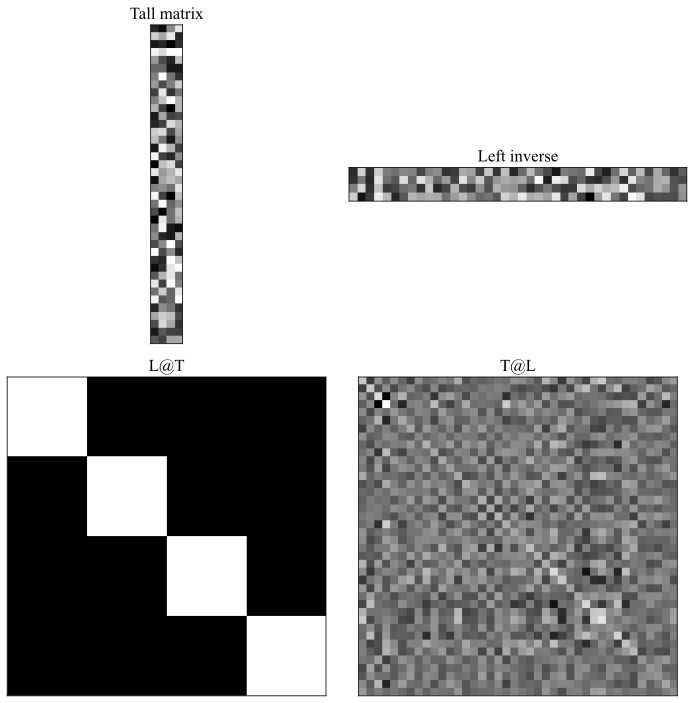

In [6]:
fig, axs = plt.subplots(2,2, figsize=(10,10))


axs[0,0].imshow(T, cmap='gray')
axs[0,0].set_title('Tall matrix')

axs[0,1].imshow(L, cmap='gray')
axs[0,1].set_title('Left inverse')

axs[1,0].imshow(L@T, cmap='gray')
axs[1,0].set_title('L@T')

axs[1,1].imshow(T@L, cmap='gray')
axs[1,1].set_title('T@L')

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.savefig('Figure_07_02.png', dpi=600)
plt.show()

# MP pseudo inverse (무어 펜로즈 의사 역행렬)

In [8]:
A = np.array([[1,4], [2,8]])

Apinv = np.linalg.pinv(A)
print(Apinv*85), print(' ') # 행렬값을 보기 편하게 변경하기 위해 85 배율 사용

A@Apinv

[[1. 2.]
 [4. 8.]]
 


array([[0.2, 0.4],
       [0.4, 0.8]])

The rank of this matrix is 5.



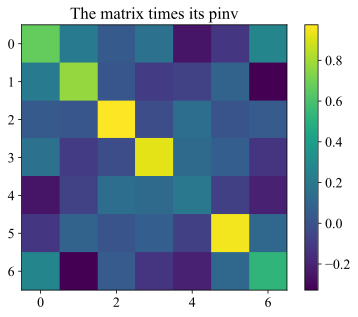

In [9]:
A = np.random.randn(7,5) @ np.random.randn(5,7)

print(f'The rank of this matrix is {np.linalg.matrix_rank(A)}.\n') # 최대 랭크는 5이다.

Apinv = np.linalg.pinv(A) # A가 full-rank(모두 선형 독립)가 아니므로 일반적인 역행렬은 존재하지 않고 대신, pseudo inverse 사용

plt.imshow(A@Apinv) #완벽한 단위행렬은 아님
plt.title('The matrix times its pinv')
plt.colorbar()
plt.show()

## Exercise 1

In [10]:
n = 5

A = np.random.randn(n,n)

Ai = np.linalg.inv(A)
Aii = np.linalg.inv(Ai) #역행렬의 역행렬은 자기 자신(A)

np.round(A-Aii, 10)

array([[-0.,  0.,  0.,  0., -0.],
       [-0.,  0., -0.,  0.,  0.],
       [-0., -0.,  0.,  0., -0.],
       [ 0.,  0.,  0.,  0., -0.],
       [-0., -0.,  0.,  0., -0.]])

## Exercise 2

In [11]:
m = 4
A = np.random.randn(m,m)

M = np.zeros((m,m))
G = np.zeros((m,m))

for i in range(m):
    for j in range(m):

        rows = [True]*m #True가 m개 있는 리스트 생성 
        rows[i] = False  # i번째 행 삭제(submatrix 만들기)

        cols = [True]*m #True가 m개 있는 리스트 생성 
        cols[j] = False  # j번째 행 삭제

        M[i,j] = np.linalg.det(A[rows, :][:, cols]) # rows, cols 모두 True인 것만 선택 -> (i,j)를 제거한 (m-1) x (m-1) 행렬 생성 후 행렬식 계산
        G[i,j] = (-1)**(i+j) # 부호 결정

C = M * G

Ainv = C.T / np.linalg.det(A) # 역행렬 계산 

AinvI = np.linalg.inv(A) # 기본 함수로 역행렬 계산(Ainv 와 결과 동일)

np.round(AinvI-Ainv, 8)


array([[ 0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0., -0.,  0.,  0.],
       [ 0., -0., -0.,  0.]])

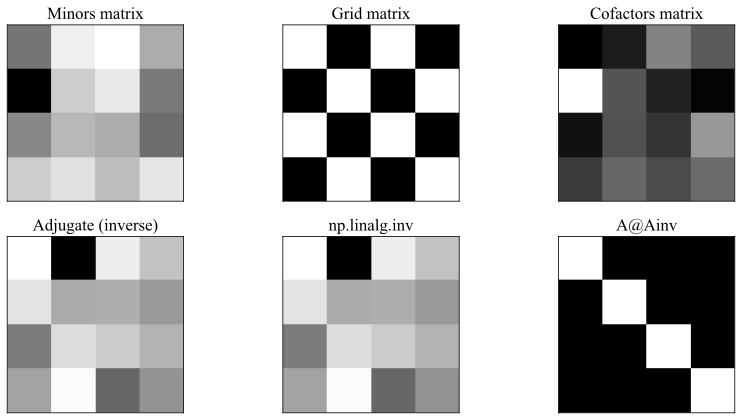

In [12]:
fig, axs = plt.subplots(2,3, figsize=(14,7))

axs[0,0].imshow(M, cmap='gray')
axs[0,0].set_title('Minors matrix') # 소행렬

axs[0,1].imshow(G, cmap='gray')
axs[0,1].set_title('Grid matrix') # 격자 행렬

axs[0,2].imshow(C, cmap='gray')
axs[0,2].set_title('Cofactors matrix') # 여인수 행렬

axs[1,0].imshow(Ainv, cmap='gray')
axs[1,0].set_title('Adjugate (inverse)') #수반 행렬(역행렬 = 원래 행렬의 행렬식의 역수를 스칼라 곱셈한 것)

axs[1,1].imshow(AinvI, cmap='gray')
axs[1,1].set_title('np.linalg.inv') # 역행렬(함수 사용)

axs[1,2].imshow(A@Ainv, cmap='gray')
axs[1,2].set_title('A@Ainv') # 원래 행렬과 역행렬의 곱 = 단위 행렬 

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.savefig('Figure_07_03.png', dpi=600)
plt.show()

## Exercise 4

In [13]:
W = np.random.randint(-10, 11, size=(4,40))

print(f'This matrix has rank={np.linalg.matrix_rank(W)}\n\n')

WWt = W@W.T # (4,4)

WWt_inv = np.linalg.inv(WWt) #(4,4)
print(np.round(WWt_inv@WWt, 4)) #원래 행렬과 역행렬의 곱 = 단위 행렬

This matrix has rank=4


[[ 1.  0.  0.  0.]
 [ 0.  1.  0. -0.]
 [-0.  0.  1. -0.]
 [ 0.  0. -0.  1.]]


In [14]:
R = W.T @ WWt_inv #(40,4)

print(np.round(W@R, 6)), print('  ') # 단위 행렬 (4,4) => 넓은 행렬이므로 오른쪽 역행렬만 존재
print(np.round(R@W, 6)) # (40,40) but 항상 단위 행렬이 아님(W가 열이 더 많은 넓은 행렬이기 때문에 왼쪽 역행렬은 존재하지 않음)

[[ 1. -0.  0.  0.]
 [ 0.  1.  0.  0.]
 [-0. -0.  1. -0.]
 [ 0.  0. -0.  1.]]
  
[[ 0.089001 -0.042724  0.027392 ...  0.024906 -0.04485   0.027459]
 [-0.042724  0.104601  0.057575 ...  0.019636  0.043158 -0.016985]
 [ 0.027392  0.057575  0.070413 ...  0.035329  0.008765 -0.016587]
 ...
 [ 0.024906  0.019636  0.035329 ...  0.05935   0.031937 -0.035187]
 [-0.04485   0.043158  0.008765 ...  0.031937  0.065473 -0.080496]
 [ 0.027459 -0.016985 -0.016587 ... -0.035187 -0.080496  0.224758]]


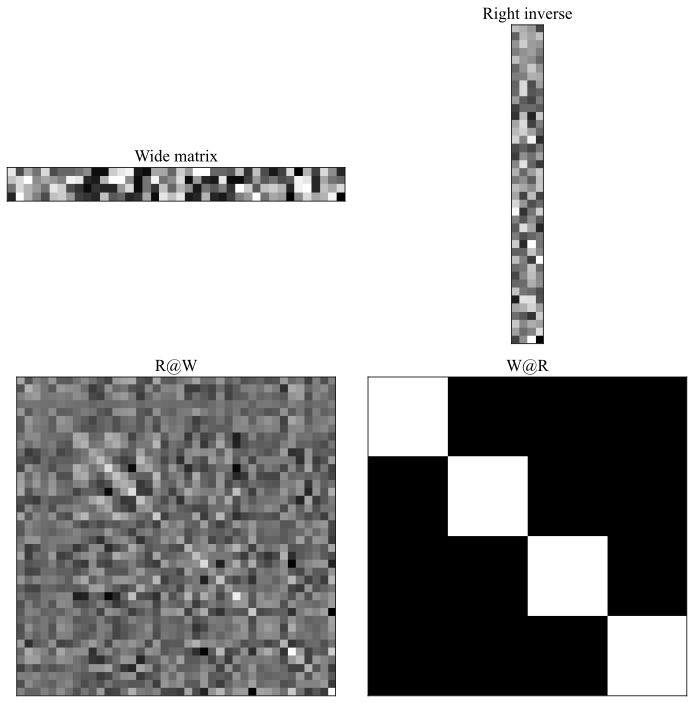

In [15]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

axs[0,0].imshow(W, cmap='gray')
axs[0,0].set_title('Wide matrix') # 소행렬

axs[0,1].imshow(R, cmap='gray')
axs[0,1].set_title('Right inverse') # 격자 행렬

axs[1,0].imshow(R@W, cmap='gray')
axs[1,0].set_title('R@W') #수반 행렬(역행렬 = 원래 행렬의 행렬식의 역수를 스칼라 곱셈한 것)

axs[1,1].imshow(W@R, cmap='gray')
axs[1,1].set_title('W@R') # 역행렬(함수 사용)

for a in axs.flatten():
    a.set_xticks([])
    a.set_yticks([])

plt.tight_layout()
plt.show()

## Exercise 5

In [16]:
# Full inverse case

M = 4

A = np.random.randn(M,M)

Ainv = np.linalg.inv(A)
Apinv = np.linalg.pinv(A)

np.round(Ainv-Apinv, 10)

# 결과 해석 : 가역 행렬(A)의 완전 역행렬(Ainv)와 의사 역행렬(Apinv)은 같다.

array([[-0.,  0., -0.,  0.],
       [ 0., -0.,  0., -0.],
       [-0.,  0., -0.,  0.],
       [-0., -0., -0., -0.]])

In [17]:
# left inverse case

M, N = 14,4

A = np.random.randn(M,N) # (14,4)

ALeft = np.linalg.inv(A.T@A) @ A.T #(4,4) @ (4,14) = (4,14) 
Apinv = np.linalg.pinv(A)

np.round(ALeft-Apinv, 10)

# 행 개수 > 열 개수인 높은 행렬의 의사 역행렬(Apinv)은 왼쪽 역행렬(ALeft)과 같다.

array([[-0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.],
       [ 0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0., -0.,
         0.],
       [-0., -0., -0., -0., -0.,  0., -0., -0.,  0., -0.,  0., -0.,  0.,
        -0.],
       [ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,  0., -0.,
         0.]])

In [19]:
# right inverse case

M, N = 4, 14

A = np.random.randn(M, N) #(4,14)

ARight = A.T @ np.linalg.inv(A@A.T) #(14,4) @ ()
Apinv = np.linalg.pinv(A)

np.round(ARight-Apinv, 10)

# 행 개수 < 열 개수인 넓은 행렬의 의사 역행렬(Apinv)은 오른쪽 역행렬(ALeft)과 같다.

array([[-0., -0., -0., -0.],
       [ 0., -0.,  0.,  0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [-0., -0.,  0., -0.],
       [ 0.,  0.,  0.,  0.],
       [-0.,  0.,  0., -0.],
       [-0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -0.],
       [-0.,  0.,  0., -0.],
       [-0., -0.,  0., -0.],
       [ 0.,  0., -0.,  0.],
       [ 0., -0., -0., -0.],
       [-0., -0., -0., -0.]])